In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command prompts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
#Import Path
path = r'C:\Users\kanch\Documents\World Happiness Report\02 Data\Cleaned Data'

In [5]:
#open 2015.csv 
df_2015 = pd.read_csv(os.path.join(path, '2015.csv'),index_col = False)


In [6]:
#open 2016.csv
df_2016 = pd.read_csv(os.path.join(path, '2016.csv'),index_col = False)

In [7]:
#open 2017.csv
df_2017 = pd.read_csv(os.path.join(path, '2017.csv'),index_col = False)

In [8]:
#open 2018.csv
df_2018 = pd.read_csv(os.path.join(path, '2018.csv'),index_col = False)

In [9]:
#open 2019.csv

df_2019 = pd.read_csv(os.path.join(path, '2019.csv'),index_col = False)

In [10]:
# Concatenate all DataFrames into one
combined_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [11]:
combined_df.shape

(782, 17)

In [12]:
combined_df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
count,782.000000,782.000000,782.000000,470.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,470.000000,157.000000,157.000000,155.000000,155.000000
mean,77.703325,78.698210,5.379018,0.081857,0.916047,1.078392,0.612416,0.411091,0.125447,0.218576,2.092717,5.282395,5.481975,5.452326,5.255713
std,45.182532,45.182384,1.127456,0.040219,0.407340,0.329548,0.248309,0.152880,0.105749,0.122321,0.565772,1.148043,1.136493,1.118542,1.145030
min,0.000000,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000,2.864884,2.521116
25%,39.000000,40.000000,4.509750,0.050765,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,1.737975,4.327000,4.465000,4.608172,4.374955
50%,78.000000,79.000000,5.322000,0.078980,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982,2.094640,5.237000,5.419000,5.370032,5.193152
75%,117.000000,118.000000,6.189500,0.097000,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832,2.455575,6.154000,6.434000,6.194600,6.006527
max,157.000000,158.000000,7.769000,0.270000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,7.460000,7.669000,7.622030,7.479556


In [13]:
columns_to_drop_1=['Unnamed: 0']

In [14]:
combined_df=combined_df.drop(columns_to_drop_1, axis=1)

#  clean data , look for outliers extreme values


<Axes: xlabel='Standard Error'>

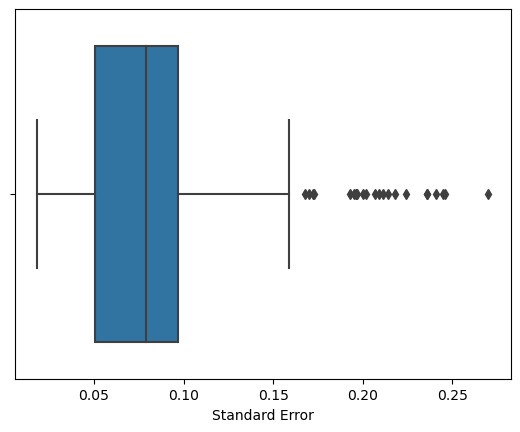

In [15]:
# Detect and visualize outliers (e.g., using box plots)
import seaborn as sns
sns.boxplot(x=combined_df['Standard Error'])

# Handle outliers (e.g., by winsorizing or removing extreme values)

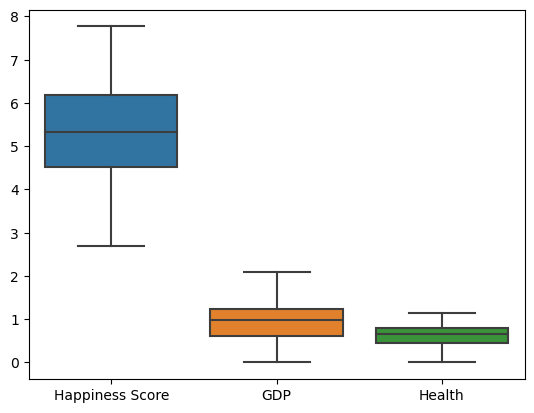

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for columns of interest
sns.boxplot(combined_df[['Happiness Score', 'GDP', 'Health']])
plt.show()


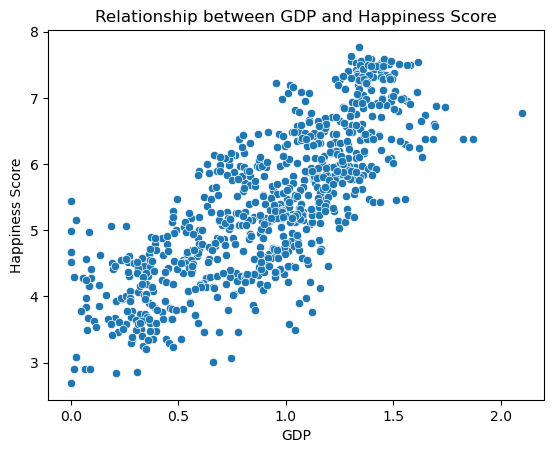

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data

#Scatterplot between Happiness Score and GDP per Capita
sns.scatterplot(x='GDP', y='Happiness Score', data=combined_df)
plt.title('Relationship between GDP and Happiness Score')
plt.show()




# Modelling

#Now it's time to use scikit-learn to perform a simple linear regression to predict Happiness Score.
First, categorical variables need to be encoded for the model, this can be done by using LabelEncoder class.

In [18]:
# encode categorical variables in order to prepare them for modelling
from sklearn import preprocessing

# Rest of your code
le = preprocessing.LabelEncoder()
combined_df['Region'] = le.fit_transform(combined_df['Region'])
combined_df['Country'] = le.fit_transform(combined_df['Country'])

#Next step is to split the dataset into train and test sets for unbiased evaluation of the final model where the dependent variable is "Happiness Score".

In [19]:
# define the predictors
features = ['Country', 'Region', 'Happiness Rank', 'Standard Error', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity',]
X = combined_df[features]
# define the target
y = combined_df['Happiness Score']

In [20]:
# split into the two subsets using random selection (67-33 policy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train['Standard Error'] = imputer.fit_transform(X_train[['Standard Error']])
X_test['Standard Error'] = imputer.transform(X_test[['Standard Error']])


# Linear Regression

In [22]:
# create linear regression object
lr = LinearRegression()
# train the model using the training set
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9862918133718395

In [23]:
# how good is our model?
print('Coefficient:', lr.score(X_train, y_train))
print('Intercept:', lr.intercept_)
print('Slope:', lr.coef_)

Coefficient: 0.9862918133718395
Intercept: 7.104275754588118
Slope: [-1.40316650e-04 -1.95100466e-03 -2.36729680e-02 -7.23696192e-01
  1.91222471e-02  9.90141445e-02 -1.17735240e-02  9.14505574e-02
  2.75083053e-01  1.92114112e-01]


In [24]:
coefficients = zip(X.columns, lr.coef_)
coefficients = pd.DataFrame(list(zip(X.columns, lr.coef_)), columns = ['Features', 'Coefficients'])
coefficients.sort_values('Coefficients', ascending = False)

,Features,Coefficients
8,Trust,0.275083
9,Generosity,0.192114
5,Family,0.099014
7,Freedom,0.091451
4,GDP,0.019122
0,Country,-0.000140
1,Region,-0.001951
6,Health,-0.011774
2,Happiness Rank,-0.023673
3,Standard Error,-0.723696


#Next step is to split the dataset into train and test sets for unbiased evaluation of the final model where the dependent variable is "Happiness Score".

In [25]:
# make predictions using testset
y_pred = lr.predict(X_test)

In [26]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.350,4.230846
1,4.441,4.407378
2,5.976,6.017326
3,4.121,3.996905
4,6.952,6.860316
5,4.073,4.011412
6,5.261,5.232659
7,5.921,6.019618
8,4.655,4.578364
9,6.891,6.959727


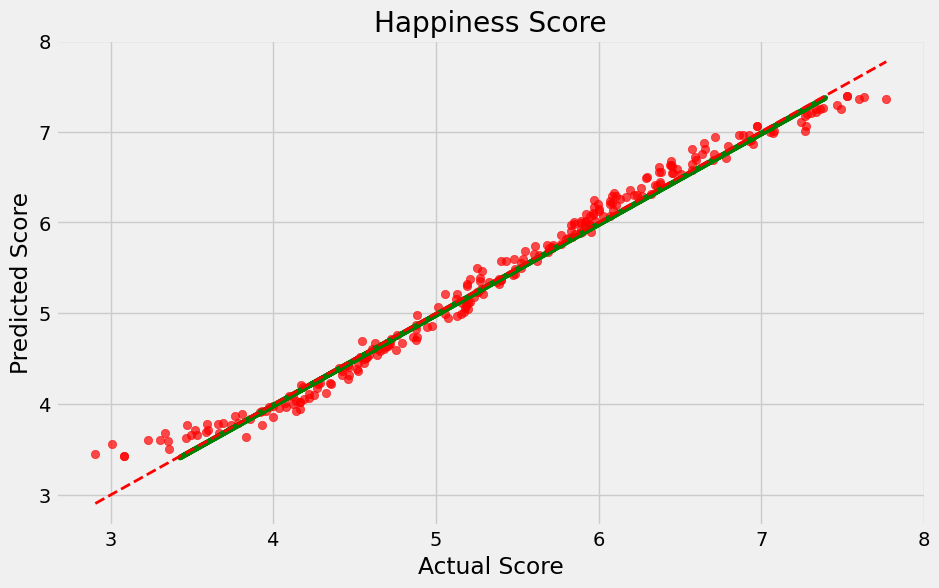

In [27]:
plt.style.use(style = 'fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'r')
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + b), color = 'g')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Happiness Score')


# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Specify the path to save the plot
export_path = r'C:\Users\kanch\Documents\World Happiness Report\04 Analysis\Visualizations\Actual vs. Predicted Values.png'

# Save the plot to the specified path
plt.savefig(export_path)

# Show the plot (optional)
plt.show()


#The scatterplot shows the relationship between the actual scores (y_test) and the predicted scores (y_pred) from our linear regression model. Each point on the plot represents an observation from the test set. The red points represent the actual scores, while the green line represents the regression line, which is the model's best attempt to predict the scores based on the independent variable(s).

#Check the model performance statistics—MSE and R2 score.

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 0.0187808113409498
R-squared (R2) Score: 0.9850057405457834


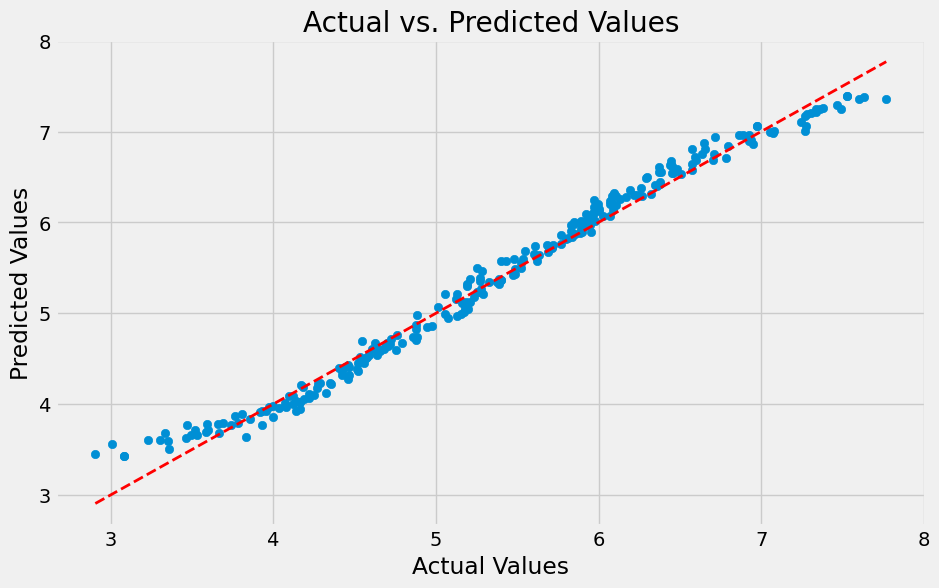

In [29]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Specify the path to save the plot
export_path = r'C:\Users\kanch\Documents\World Happiness Report\04 Analysis\Visualizations\Actual vs. Predicted Values.png'

# Save the plot to the specified path
plt.savefig(export_path)

# Show the plot
plt.show()




#The red dashed line in the graph is a diagonal reference line that represents perfect predictions. If all the points were exactly on this line, it would mean that the model's predictions perfectly match the actual values. In other words, every predicted value equals the corresponding actual value.

# Include your thoughts on how well the model performed on the test set in a markdown cell.
#Include any reflections you have on the impact of possible data bias.

# Model Performance Evaluation

The linear regression model was applied to our dataset, and its performance was assessed on the test set. Here are my thoughts on how well the model performed:

Mean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. 

R-squared (R2) Score: The R2 score quantifies the proportion of variance in the dependent variable (y) explained by the independent variable (X). It ranges from 0 to 1, where 1 indicates a perfect fit.

# Reflections on Data Bias

When working with any dataset and building predictive models, it's crucial to consider the potential impact of data bias. 

Addressing data bias requires a combination of careful data collection, preprocessing, and model evaluation. Regularly validating the model's performance on diverse and representative data is essential to detect and mitigate bias effectively.




In [30]:
# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\kanch\Documents\World Happiness Report\02 Data\Prepared Data.xlsx'  # Replace with your desired file path

# Export the DataFrame to an Excel file
combined_df.to_excel(excel_file_path, index=False)  # Set index to False if you don't want to save the index

print("DataFrame has been exported to Excel successfully.")


DataFrame has been exported to Excel successfully.
